In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/multivariate/exchange_rate/exchange_rate.txt",
                 header=None)
df

,0,1,2,3,4,5,6,7
0,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.593000,0.525486
1,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.594000,0.523972
2,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.597300,0.526316
3,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.597000,0.523834
4,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.598500,0.527426
...,...,...,...,...,...,...,...,...
7583,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.690846,0.688565
7584,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.695701,0.690288
7585,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.695943,0.691419
7586,0.720825,1.233905,0.744131,0.980344,0.143993,0.008555,0.692689,0.690942


In [3]:
import pandas as pd

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def draw_true_predict(y_true, y_pred):
    size = len(y_true)
    plt.plot(list(range(size)), y_true, label='real', color='blue')
    plt.plot(list(range(size)), y_pred, label='predicted', color='red')
    plt.legend(loc='best')
    plt.title('Real vs Predicted values')
    plt.show()

def calculate_metrics(y_true, y_pred):
    # Calculate metrics
    MSE = mean_squared_error(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    print(f"MSE: {MSE}, MAPE: {MAPE}, R2: {R2}")

In [12]:
data = series_to_supervised(df, n_in=2, n_out=2)
data

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var1(t-1),var2(t-1),...,var7(t),var8(t),var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var6(t+1),var7(t+1),var8(t+1)
2,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.593000,0.525486,0.781800,1.610000,...,0.597300,0.526316,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.597000,0.523834
3,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.594000,0.523972,0.786700,1.629300,...,0.597000,0.523834,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.598500,0.527426
4,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.597300,0.526316,0.786000,1.637000,...,0.598500,0.527426,0.786600,1.653700,0.861030,0.654879,0.211242,0.006887,0.604000,0.526177
5,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.597000,0.523834,0.784900,1.653000,...,0.604000,0.526177,0.788600,1.662000,0.862887,0.661157,0.211242,0.006885,0.607000,0.527565
6,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.598500,0.527426,0.786600,1.653700,...,0.607000,0.527565,0.791000,1.656800,0.864304,0.659631,0.211242,0.006878,0.608400,0.527565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7582,0.719114,1.227800,0.738089,0.973189,0.143962,0.008527,0.687687,0.691133,0.719735,1.228501,...,0.688753,0.690164,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.690846,0.688565
7583,0.719735,1.228501,0.740384,0.973047,0.143972,0.008537,0.690846,0.690978,0.718701,1.226001,...,0.690846,0.688565,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.695701,0.690288
7584,0.718701,1.226001,0.737776,0.972479,0.143833,0.008510,0.688753,0.690164,0.718494,1.222195,...,0.695701,0.690288,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.695943,0.691419
7585,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.690846,0.688565,0.721839,1.223459,...,0.695943,0.691419,0.720825,1.233905,0.744131,0.980344,0.143993,0.008555,0.692689,0.690942


In [13]:
X, Y = data.iloc[:,:24], data.iloc[:,-8:]
print(X.shape, Y.shape)

(7585, 24) (7585, 8)


MSE: 0.010767254587710018, MAPE: 0.08817666059262419, R2: -3.901861226783438


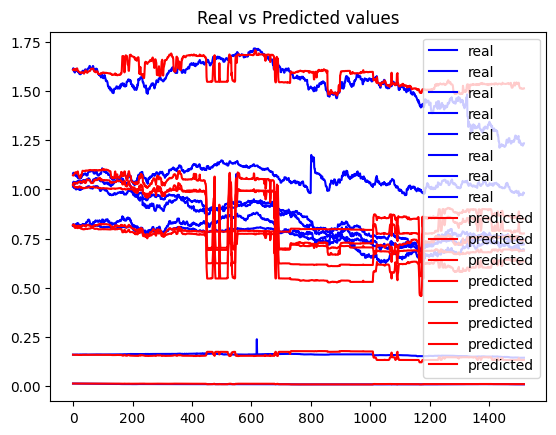

In [14]:
# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)

scaler_feature = StandardScaler()
scaler_feature.fit(X_train)
X_train_scaled = scaler_feature.transform(X_train)
X_test_scaled = scaler_feature.transform(X_test)

scaler_label = StandardScaler()
scaler_label.fit(Y_train)
Y_train_scaled = scaler_label.transform(Y_train)
Y_test_scaled = scaler_label.transform(Y_test)

# Initialize the estimator
estimator = RandomForestRegressor()

# Fit the data
estimator.fit(X_train_scaled, Y_train_scaled)

# Make predictions
y_pred = estimator.predict(X_test_scaled)
y_pred_unscaled = scaler_label.inverse_transform(y_pred)

# Calculate metrics
calculate_metrics(Y_test, y_pred_unscaled)

draw_true_predict(Y_test, y_pred_unscaled)


In [16]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Định nghĩa các tham số mà bạn muốn tinh chỉnh
param_grid = {
    'n_estimators': [50, 100, 200],  # Số lượng cây trong rừng ngẫu nhiên
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10]  # Số lượng mẫu tối thiểu để chia một nút
}

# Khởi tạo mô hình
model = RandomForestRegressor()

# Sử dụng TimeSeriesSplit để chia dữ liệu thành các tập huấn luyện và kiểm tra theo thời gian
tscv = TimeSeriesSplit(n_splits=5)

# Khởi tạo GridSearchCV
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_grid, scoring='neg_mean_squared_error')

# Huấn luyện mô hình với dữ liệu
gsearch.fit(X_train_scaled, Y_train_scaled)

# In ra các tham số tốt nhất
print("Best parameters found: ", gsearch.best_params_)

# Sử dụng mô hình tốt nhất để dự đoán
best_model = gsearch.best_estimator_
y_pred = best_model.predict(X_test_scaled)


Best parameters found:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}


MSE: 0.5593469445317494, MAPE: 1.9688729264323672, R2: -2.6981552400952618


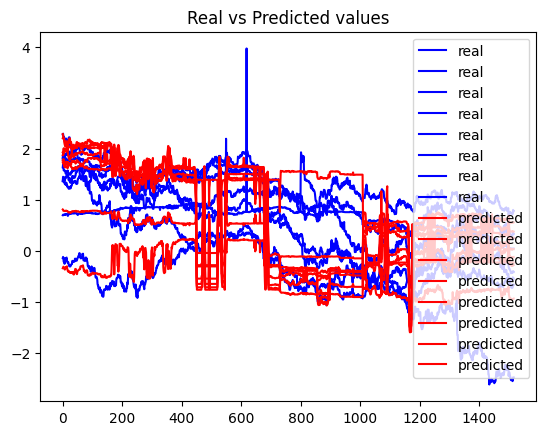

In [17]:
calculate_metrics(Y_test, y_pred)

draw_true_predict(Y_test, y_pred)
